In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load corrected CSV
df = pd.read_csv("tei_speaker_lines_with_corrected_year.csv")

# Optional: Remove rows with missing or invalid years
df = df[df['Year'].apply(lambda x: str(x).isdigit())]
df['Year'] = df['Year'].astype(int)


Aggregate lines by year

In [2]:
# Group all lines per year into one big text blob
lines_by_year = df.groupby('Year')['Line'].apply(lambda texts: ' '.join(texts)).reset_index()


In [4]:
top_n = 10  # number of top words per year

In [5]:
# Prepare plot data containers
years = []
words = []
frequencies = []

for _, row in lines_by_year.iterrows():
    year = row['Year']
    text = row['Line']

    # Vectorize for this year's text
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    word_counts = X.toarray().flatten()
    vocab = vectorizer.get_feature_names_out()

    # Get top N words for the year
    top_indices = word_counts.argsort()[-top_n:][::-1]
    top_words = vocab[top_indices]
    top_counts = word_counts[top_indices]

    # Collect data for plotting
    for w, c in zip(top_words, top_counts):
        years.append(year)
        words.append(w)
        frequencies.append(c)

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Year': years,
    'Word': words,
    'Frequency': frequencies
})

Normalize bubble sizes for visualization

In [6]:
max_freq = plot_df['Frequency'].max()
plot_df['Size'] = plot_df['Frequency'] / max_freq * 1000  # scale sizes

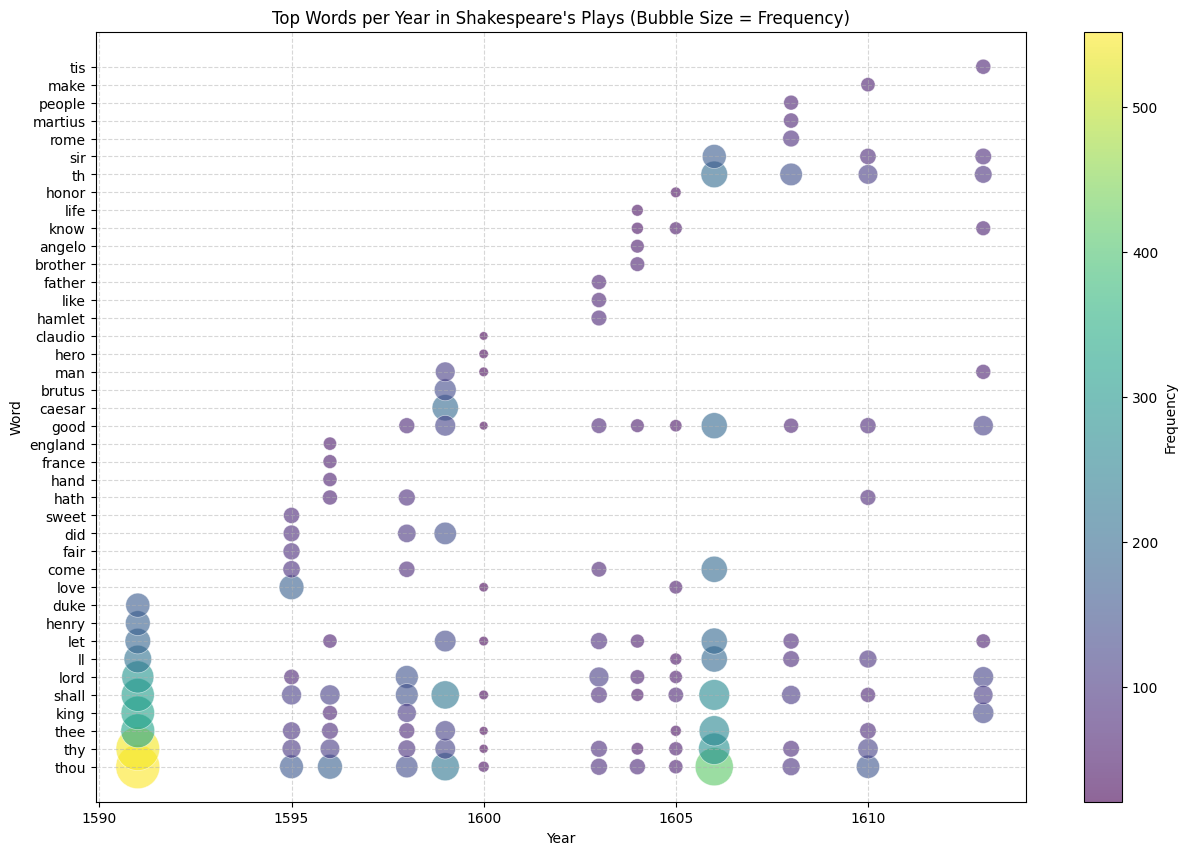

In [7]:
# Create bubble plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    plot_df['Year'], 
    plot_df['Word'], 
    s=plot_df['Size'], 
    alpha=0.6, 
    edgecolors="w", 
    linewidth=0.5,
    c=plot_df['Frequency'], cmap='viridis'
)
plt.colorbar(scatter, label='Frequency')
plt.xlabel("Year")
plt.ylabel("Word")
plt.title("Top Words per Year in Shakespeare's Plays (Bubble Size = Frequency)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()